Analysis of superstore sales


In [5]:
# importing the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
df=pd.read_csv("superstore.csv")  # read the files 
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


information about datasets

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [79]:
df.head(10)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,1,2011-12-05 00:00:00.000,CA-2011-133830,...,49,Consumer,2011-12-10 00:00:00.000,Standard Class,1.99,California,Paper,2011,North America,50


get essential columns only

In [10]:
superStore = df[['Customer.ID','Customer.Name','Product.Name', 'Category','Sub.Category', 'Country','State',
       'Order.ID','Order.Date', 'Region','Ship.Date', 'Ship.Mode', 'Shipping.Cost',
       'Discount', 'Profit', 'Quantity','Sales', 'Segment']]

superStore

,Customer.ID,Customer.Name,Product.Name,Category,Sub.Category,Country,State,Order.ID,Order.Date,Region,Ship.Date,Ship.Mode,Shipping.Cost,Discount,Profit,Quantity,Sales,Segment
0,LS-172304,Lycoris Saunders,Xerox 225,Office Supplies,Paper,United States,California,CA-2011-130813,2011-01-07 00:00:00.000,West,2011-01-09 00:00:00.000,Second Class,4.37,0.0,9.3312,3,19,Consumer
1,MV-174854,Mark Van Huff,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,United States,California,CA-2011-148614,2011-01-21 00:00:00.000,West,2011-01-26 00:00:00.000,Standard Class,0.94,0.0,9.2928,2,19,Consumer
2,CS-121304,Chad Sievert,"Adams Phone Message Book, Professional, 400 Me...",Office Supplies,Paper,United States,California,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,1.81,0.0,9.8418,3,21,Consumer
3,CS-121304,Chad Sievert,Xerox 1913,Office Supplies,Paper,United States,California,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,4.59,0.0,53.2608,2,111,Consumer
4,AP-109154,Arthur Prichep,Xerox 223,Office Supplies,Paper,United States,California,CA-2011-146969,2011-09-29 00:00:00.000,West,2011-10-03 00:00:00.000,Standard Class,1.32,0.0,3.1104,1,6,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,AM-103604,Alice McCarthy,Satellite Sectional Post Binders,Office Supplies,Binders,United States,California,CA-2014-109701,2014-12-03 00:00:00.000,West,2014-12-04 00:00:00.000,Same Day,5.15,0.2,22.5732,2,69,Corporate
51286,AM-103604,Alice McCarthy,Staples,Office Supplies,Binders,United States,California,CA-2014-109701,2014-12-03 00:00:00.000,West,2014-12-04 00:00:00.000,Same Day,0.44,0.2,3.1584,6,9,Corporate
51287,HR-147704,Hallie Redmond,GBC Plastic Binding Combs,Office Supplies,Binders,United States,California,CA-2014-106964,2014-12-18 00:00:00.000,West,2014-12-21 00:00:00.000,First Class,0.31,0.2,4.2804,2,12,Home Office
51288,RM-196754,Robert Marley,Vinyl Sectional Post Binders,Office Supplies,Binders,United States,California,CA-2014-145219,2014-12-25 00:00:00.000,West,2014-12-26 00:00:00.000,First Class,15.95,0.2,33.9300,3,90,Home Office


In [81]:
superStore.columns

Index(['Customer.ID', 'Customer.Name', 'Product.Name', 'Category',
       'Sub.Category', 'Country', 'State', 'Order.ID', 'Order.Date', 'Region',
       'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'Discount', 'Profit',
       'Quantity', 'Sales', 'Segment'],
      dtype='object')

In [82]:
# find the shape of datsets.
superStore.shape

(51290, 18)

In [11]:
column,row=superStore.shape
print(f'this is records{column} and this is attributes{row}')

this is records51290 and this is attributes18


get knowledge about staics things

In [12]:
superStore.describe()

,Shipping.Cost,Discount,Profit,Quantity,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,26.375818,0.142908,28.610982,3.476545,246.498440
std,57.296810,0.212280,174.340972,2.278766,487.567175
min,0.002000,0.000000,-6599.978000,1.000000,0.000000
25%,2.610000,0.000000,0.000000,2.000000,31.000000
50%,7.790000,0.000000,9.240000,3.000000,85.000000
75%,24.450000,0.200000,36.810000,5.000000,251.000000
max,933.570000,0.850000,8399.976000,14.000000,22638.000000


this datasets has not null values 

In [13]:
superStore.isnull().sum()

Customer.ID      0
Customer.Name    0
Product.Name     0
Category         0
Sub.Category     0
Country          0
State            0
Order.ID         0
Order.Date       0
Region           0
Ship.Date        0
Ship.Mode        0
Shipping.Cost    0
Discount         0
Profit           0
Quantity         0
Sales            0
Segment          0
dtype: int64

create new column price 

In [14]:
superStore['price']=round(superStore['Sales']/superStore['Quantity'],3)
superStore

C:\Users\Om\AppData\Local\Temp\ipykernel_16964\1472222910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superStore['price']=round(superStore['Sales']/superStore['Quantity'],3)


,Customer.ID,Customer.Name,Product.Name,Category,Sub.Category,Country,State,Order.ID,Order.Date,Region,Ship.Date,Ship.Mode,Shipping.Cost,Discount,Profit,Quantity,Sales,Segment,price
0,LS-172304,Lycoris Saunders,Xerox 225,Office Supplies,Paper,United States,California,CA-2011-130813,2011-01-07 00:00:00.000,West,2011-01-09 00:00:00.000,Second Class,4.37,0.0,9.3312,3,19,Consumer,6.333
1,MV-174854,Mark Van Huff,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,United States,California,CA-2011-148614,2011-01-21 00:00:00.000,West,2011-01-26 00:00:00.000,Standard Class,0.94,0.0,9.2928,2,19,Consumer,9.500
2,CS-121304,Chad Sievert,"Adams Phone Message Book, Professional, 400 Me...",Office Supplies,Paper,United States,California,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,1.81,0.0,9.8418,3,21,Consumer,7.000
3,CS-121304,Chad Sievert,Xerox 1913,Office Supplies,Paper,United States,California,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,4.59,0.0,53.2608,2,111,Consumer,55.500
4,AP-109154,Arthur Prichep,Xerox 223,Office Supplies,Paper,United States,California,CA-2011-146969,2011-09-29 00:00:00.000,West,2011-10-03 00:00:00.000,Standard Class,1.32,0.0,3.1104,1,6,Consumer,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,AM-103604,Alice McCarthy,Satellite Sectional Post Binders,Office Supplies,Binders,United States,California,CA-2014-109701,2014-12-03 00:00:00.000,West,2014-12-04 00:00:00.000,Same Day,5.15,0.2,22.5732,2,69,Corporate,34.500
51286,AM-103604,Alice McCarthy,Staples,Office Supplies,Binders,United States,California,CA-2014-109701,2014-12-03 00:00:00.000,West,2014-12-04 00:00:00.000,Same Day,0.44,0.2,3.1584,6,9,Corporate,1.500
51287,HR-147704,Hallie Redmond,GBC Plastic Binding Combs,Office Supplies,Binders,United States,California,CA-2014-106964,2014-12-18 00:00:00.000,West,2014-12-21 00:00:00.000,First Class,0.31,0.2,4.2804,2,12,Home Office,6.000
51288,RM-196754,Robert Marley,Vinyl Sectional Post Binders,Office Supplies,Binders,United States,California,CA-2014-145219,2014-12-25 00:00:00.000,West,2014-12-26 00:00:00.000,First Class,15.95,0.2,33.9300,3,90,Home Office,30.000


indetify the sales by category wise

In [15]:
category_wise = superStore.groupby('Category')['Sales'].sum().nsmallest(4).reset_index()
category_wise

,Category,Sales
0,Office Supplies,3787330
1,Furniture,4110884
2,Technology,4744691


determine the sales by state wise 

In [65]:
statewise = superStore.groupby('State')['Sales'].sum().nsmallest(5).reset_index()

statewise

,State,Sales
0,Matabeleland North,3
1,Kabarole,4
2,Bitola,11
3,Manicaland,12
4,Pernik,15


identify the sales by country wise

In [16]:
country_wise = superStore.groupby('Country')['Sales'].sum().nsmallest(10).reset_index()

country_wise

,Country,Sales
0,Equatorial Guinea,150
1,Armenia,156
2,Eritrea,188
3,Macedonia,210
4,Tajikistan,242
5,Burundi,268
6,Swaziland,288
7,Bahrain,669
8,United Arab Emirates,742
9,Ethiopia,850


top 30 customners make profit

In [17]:
customer = superStore.groupby(['Customer.ID','Customer.Name'])['Profit'].sum().nlargest(5).reset_index()
customer

,Customer.ID,Customer.Name,Profit
0,TC-209804,Tamara Chand,8981.3239
1,RB-193604,Raymond Buch,6976.0959
2,SC-200954,Sanjit Chand,5757.4119
3,HL-150404,Hunter Lopez,5622.4292
4,AB-101054,Adrian Barton,5444.8055


country wise sales by subcatagory 

In [63]:
subcatagory__by_county = superStore.groupby(['Country','Sub.Category'])['Sales'].sum().nsmallest(5).reset_index()
subcatagory__by_county

,Country,Sub.Category,Sales
0,Tajikistan,Labels,3
1,Turkmenistan,Fasteners,3
2,Tajikistan,Envelopes,4
3,Turkmenistan,Paper,4
4,Uganda,Fasteners,4


sales by subcatagory

In [88]:
subcatgory = superStore.groupby('Sub.Category')['Sales'].sum().nsmallest(10).reset_index()
subcatgory

,Sub.Category,Sales
0,Labels,73433
1,Fasteners,83254
2,Envelopes,170926
3,Supplies,243090
4,Paper,244307
5,Art,372163
6,Furnishings,385609
7,Binders,461952
8,Accessories,749307
9,Tables,757034


find the profit by country wise

In [71]:
country_profit=superStore.groupby('Country')['Profit'].sum().nlargest(10).reset_index()
country_profit

,Country,Profit
0,United States,286397.02170
1,China,150683.08500
2,India,129071.83500
3,United Kingdom,111900.15000
4,France,109029.00300
5,Germany,107322.82050
6,Australia,103907.43300
7,Mexico,102818.09752
8,Spain,54390.12000
9,El Salvador,42023.24320


C:\Users\Om\AppData\Local\Temp\ipykernel_3112\3648667971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub.Category',y='Sales', data=subcatgory,palette='Set2')


Text(0.5, 1.0, 'sales by sub-category wise')

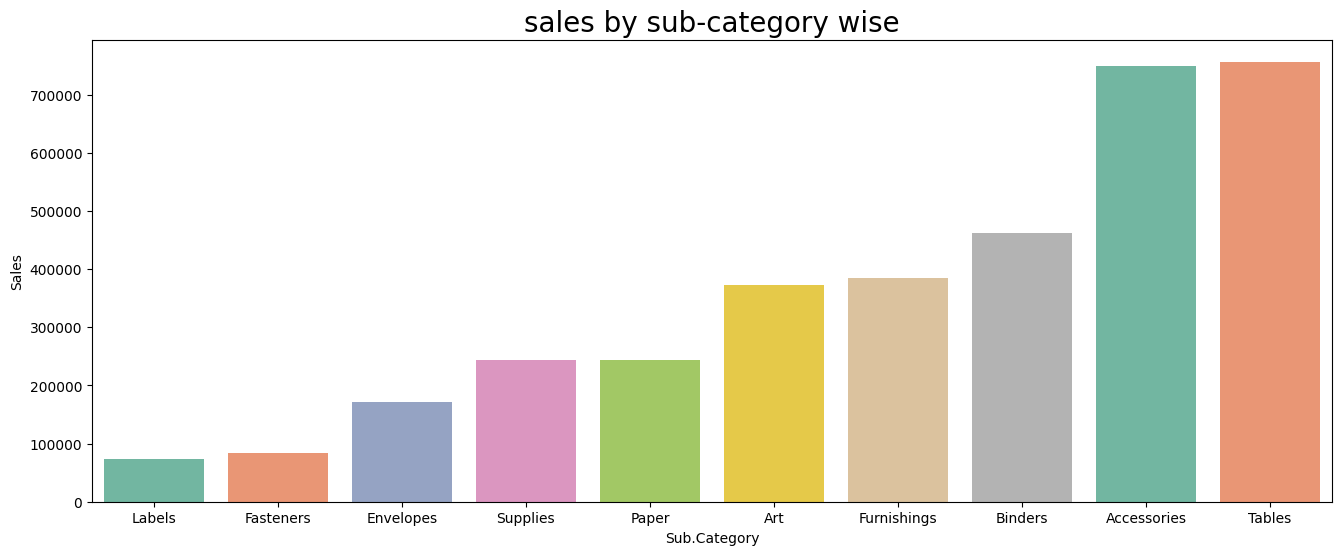

In [97]:
plt.figure(figsize=(16,6))
sns.barplot(x='Sub.Category',y='Sales', data=subcatgory,palette='Set2')
plt.title("sales by sub-category wise",fontsize="20")

profit by country wise 

C:\Users\Om\AppData\Local\Temp\ipykernel_3112\600033778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country',y='Profit', data=country_profit,palette='viridis')


Text(0.5, 1.0, 'profit by country wise')

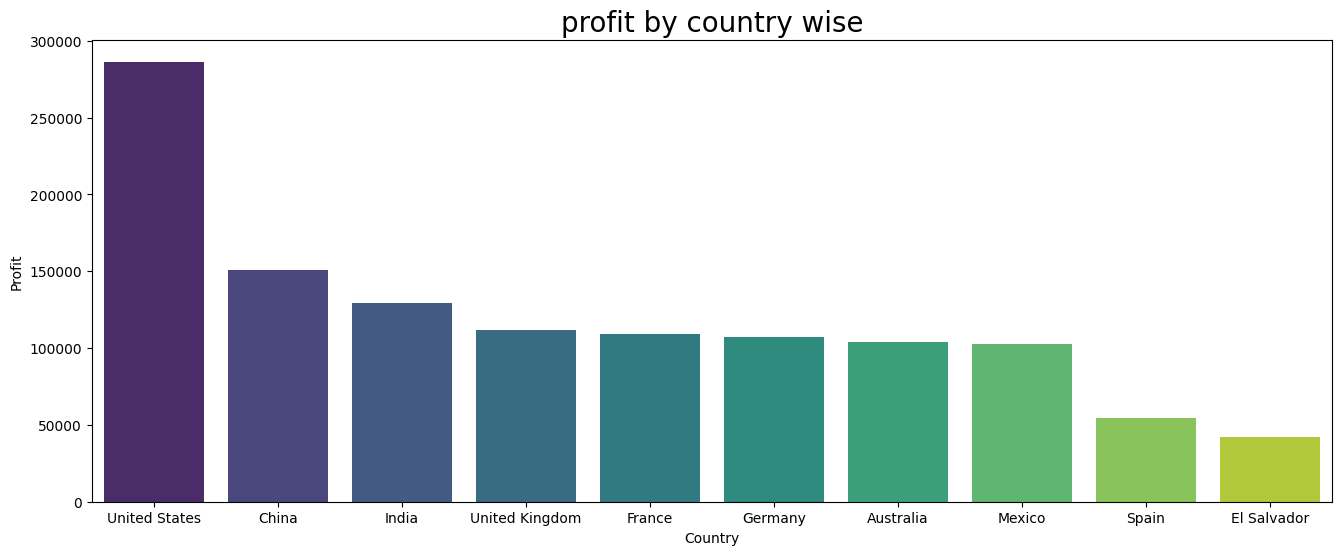

In [105]:
plt.figure(figsize=(16,6))
sns.barplot(x='Country',y='Profit', data=country_profit,palette='viridis')
plt.title("profit by country wise",fontsize="20")

graphical representation of country wise sales

C:\Users\Om\AppData\Local\Temp\ipykernel_3112\2785080003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_wise,x="Country",y="Sales",palette='coolwarm')


Text(0.5, 1.0, 'country wise sales')

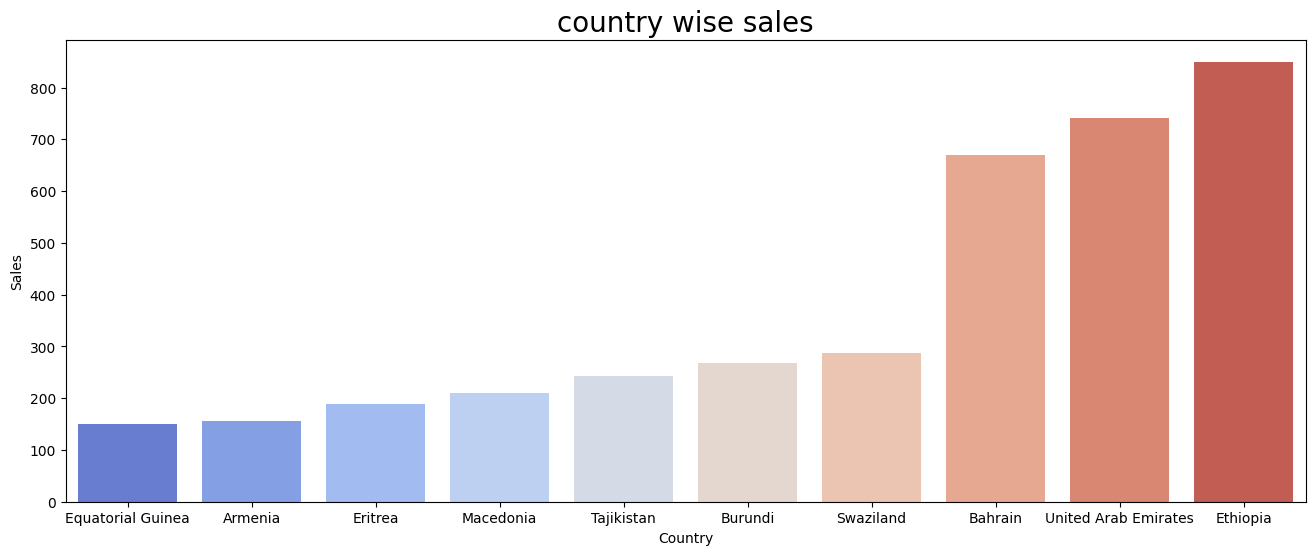

In [112]:
plt.figure(figsize=(16,6))
sns.barplot(data=country_wise,x="Country",y="Sales",palette='coolwarm')
plt.title("country wise sales",fontsize=20)

identify the sales of sub-category by  percentage 

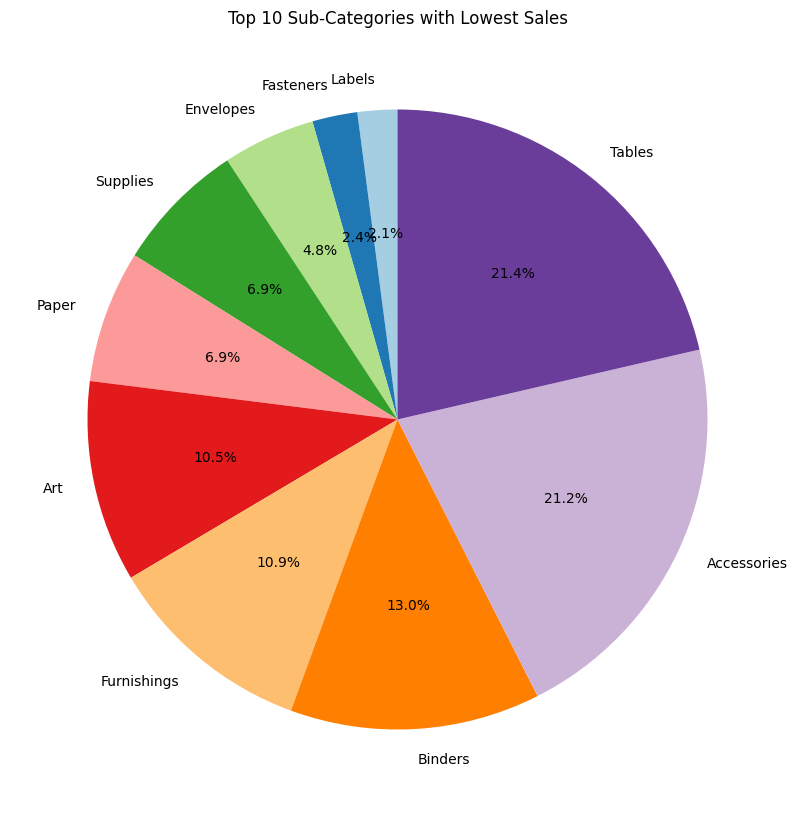

In [116]:
labels = subcatgory['Sub.Category']
values = subcatgory['Sales']


plt.figure(figsize=(10,15))

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Sub-Categories with Lowest Sales')
plt.show()

making highest profitable customers 

Text(0.5, 1.0, 'making highest profit by customer')

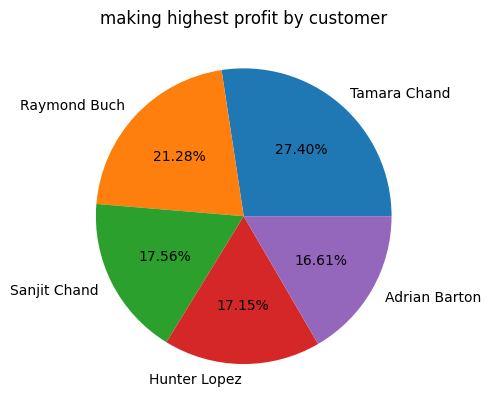

In [21]:
labels=customer['Customer.Name']
values=customer['Profit']
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("making highest profit by customer")